In [1]:
__author__='Maciej Nowaczyk'

!pip install keras

In [2]:
from keras.datasets import mnist

In [3]:
import tensorflow as tf

In [4]:
import numpy as np
import pandas as pd


In [5]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [6]:
train_images.shape

(60000, 28, 28)

In [7]:
len(train_labels)

60000

In [8]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [9]:
test_images.shape

(10000, 28, 28)

In [10]:
len(test_labels)

10000

In [11]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [12]:
from keras import models
from keras import layers
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

In [13]:
#
#weights = {
#    'w1': tf.Variable(tf.compat.v1([n_input, n_hidden1], stddev=0.1)),
#    'w2': tf.Variable(tf.compat.v1([n_hidden1, n_hidden2], stddev=0.1)),
#    'w3': tf.Variable(tf.compat.v1([n_hidden2, n_hidden3], stddev=0.1)),
#    'out': tf.Variable(tf.compat.v1([n_hidden3, n_output], stddev=0.1)),
#}

In [14]:
network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [16]:
from keras.utils import to_categorical

# reshape our training image data by flattening it
train_images = train_images.reshape((60000, 28 * 28))
# scale our pixel values so that it fits between 0 and 1
train_images = train_images.astype('float32') / 255

# reshape our testing image data by flattening it
test_images = test_images.reshape((10000, 28 * 28))
# scale our pixel values so that it fits between 0 and 1
test_images = test_images.astype('float32') / 255



# encode our train labels into a vector
train_labels = to_categorical(train_labels)
# endoe our test labels
test_labels = to_categorical(test_labels)

In [17]:
network.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [18]:
network.fit(train_images, train_labels, epochs=6, batch_size=128)
test_loss, test_acc = network.evaluate(test_images, test_labels)

Epoch 1/6
469/469 [==============================] - 7s 16ms/step - loss: 1.4740 - accuracy: 0.6574
Epoch 2/6
469/469 [==============================] - 7s 15ms/step - loss: 0.5848 - accuracy: 0.8544
Epoch 3/6
469/469 [==============================] - 7s 16ms/step - loss: 0.4095 - accuracy: 0.8897
Epoch 4/6
469/469 [==============================] - 7s 15ms/step - loss: 0.3520 - accuracy: 0.9011
Epoch 5/6
469/469 [==============================] - 7s 15ms/step - loss: 0.3229 - accuracy: 0.9080
Epoch 6/6
313/313 [==============================] - 1s 4ms/step - loss: 0.2895 - accuracy: 0.9141


In [19]:
print('test_acc:', test_acc)

test_acc: 0.9140999913215637


In [20]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [21]:
print(train_images.ndim)

3


In [22]:
print(train_images.shape)

(60000, 28, 28)


In [23]:
print(train_images.dtype)

uint8


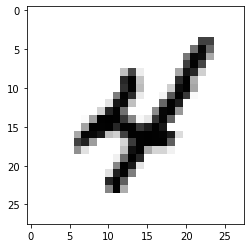

In [32]:
digit = train_images[9]
import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [25]:
from keras.utils.vis_utils import plot_model

In [26]:
!pip install pydot

In [27]:
import pydot

In [28]:
plot_model(network, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [29]:
!pip install ann_visualizer

In [30]:
!pip install graphviz

In [33]:
from ann_visualizer.visualize import ann_viz;


In [34]:

ann_viz(network, title="Neural Network for digit recognition")

ExecutableNotFound: failed to execute ['dot', '-Tpdf', '-O', 'network.gv'], make sure the Graphviz executables are on your systems' PATH

In [35]:
import os